In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from html.parser import HTMLParser
from bs4 import BeautifulSoup
import os
import pandas as pd
import csv
#import pickle

In [2]:
def get_suitor_info(directory):
    all_entries = {}
    #file_list= []
    like_list = []
    new_profile = []
    #my_dir = os.getcwd()

    #retrieve every record of a suitor from every profile#.html file
    #like_list is a list in which each element is a list of the details of a suitor
    for file in os.listdir(directory):
        if file.endswith(".html"):
            new_file_indicator = True
            #file_list.append(os.path.join(directory, file))
            profile = open(os.path.join(directory, file),'r',encoding='utf8',errors='ignore')
            source_code = profile.read()
            profile.close()
            soup = BeautifulSoup(source_code, 'html.parser')
            name_list = soup.find_all('span')
            profile_image_counter = 0
            background_images = {}
            for a in name_list:
                div_list = a.find_all('div')
                for aa in div_list:
                    keys = aa.attrs
                    if "style" in keys:
                        if "background-image:" in aa["style"]:
                            profile_image_counter += 1
                            #split1 = aa["style"].rpartition("/")
                            #split2 = split1[2].rpartition('"')
                            split1 = aa["style"].partition('"')
                            split2 = split1[2].rpartition('"')
                            background_images[profile_image_counter] = split2[0]
                        
                keys = a.attrs
                if "class" in keys:
                    if new_file_indicator:
                        if new_profile:
                            like_list.append(new_profile)
                            new_profile = []
                        new_file_indicator = False
                        profile_counter = 0
                    if "recCard__name" in a["class"]:
                        like_list.append(new_profile)
                        new_profile = [file]
                        profile_counter += 1
                        new_profile.append(profile_counter)
                        if profile_counter in background_images.keys():
                            new_profile.append(background_images[profile_counter])
                        else:
                            print(file)
                            print(profile_counter)
                            print(background_images)
                            print()
                            new_profile.append(float('nan'))
                        new_profile.append(a.string)
                    elif "recCard__age" in a["class"]:
                        if bool(a.string):
                            new_profile.append(int(a.string[2:]))
                        else:
                            new_profile.append(a.string)
                    elif "Fz($ms)" in a["class"] or " W(100%)" in a["class"] or "D(b)" in a["class"]:
                        new_profile.append(a.string)
    if new_profile:
        like_list.append(new_profile)

    #organize all the records in like_list by filename
    #all_entries is a dictionary that has the filename as its key and a list of entries from like_list as its value
    profile_number = 'blah'
    for b in like_list:
        if b:
            if b[0] != profile_number:
                profile_number = b[0]
                all_entries[profile_number] = []
            all_entries[profile_number].append(b[1:])

    #get the 2nd suitor record of each file
    #suitor_list is the actual list of liked suitors
    num_columns = 0
    suitor_list = []
    for c in all_entries:
        suitor = [c]
        suitor.extend(all_entries[c][1])
        suitor_list.append(suitor)
        if len(all_entries[c][1]) > num_columns:
            num_columns = len(all_entries[c][1])

    #make number of columns data dependent
    columns = ['filename', 'file_position', 'profile_image','name', 'age']
    detail_number = 1
    while len(columns) <= num_columns:
        columns.append('detail_' + str(detail_number))
        detail_number += 1

    #write the record of every swipe
    suitor_df = pd.DataFrame(suitor_list,columns=columns)
    #suitor_df.to_csv('all_suitors.csv', header=True, index=False)

    #fill in missing values to enable counting of unique profiles
    suitor_df = suitor_df.fillna('NO DATA')

    #count the number of unique profiles
    #write the record of unique profiles in the run, including the number of times that profile appears
    #groupby_list = columns[1:]
    groupby_list = columns[2:]
    unique_suitors = suitor_df.groupby(groupby_list)['filename'].count()
    #unique_suitors.to_csv('unique_suitors.csv', header=True)

    #write the record of profiles that appeared more than once during the run
    duplicate_suitors = unique_suitors[unique_suitors>1]
    #duplicate_suitors.to_csv('duplicate_suitors.csv', header=True)

    #write all records of all suitors in every profile#.html file
    #not sure how to handle strange characters-- ignoring for now
    #with open('original_suitor_records.csv', 'w', newline='',errors='ignore') as original_suitor_records:
        #wr = csv.writer(original_suitor_records)
        #wr.writerow(columns)
        #for d in like_list:
            #if d:
                #wr.writerow(d)
    
    return unique_suitors, duplicate_suitors, suitor_df, all_entries

In [3]:
complete_records = {}
directories = os.walk(os.getcwd())
for folder in directories:
    #print(folder)
    current_dir = folder[0]
    subfolders = folder[1]
    contents = folder[2]
    if contents:
        if any('.html' in file for file in contents):
            complete_records[current_dir] = get_suitor_info(current_dir)

profile10.html
1
{}

profile10.html
2
{}

profile10.html
3
{}

profile10.html
4
{}

profile10.html
5
{}

profile10.html
6
{}

profile16.html
1
{}

profile16.html
2
{}

profile16.html
3
{}

profile16.html
4
{}

profile16.html
5
{}

profile16.html
6
{}

profile37.html
1
{}

profile37.html
2
{}

profile37.html
3
{}

profile38.html
1
{}

profile38.html
2
{}

profile38.html
3
{}

profile40.html
1
{}

profile40.html
2
{}

profile40.html
3
{}

profile42.html
1
{}

profile42.html
2
{}

profile42.html
3
{}

profile49.html
1
{}

profile49.html
2
{}

profile49.html
3
{}

profile51.html
1
{}

profile51.html
2
{}

profile51.html
3
{}

profile61.html
1
{}

profile61.html
2
{}

profile61.html
3
{}

profile61.html
4
{}

profile61.html
5
{}

profile61.html
6
{}

profile9.html
1
{}

profile9.html
2
{}

profile9.html
3
{}

profile9.html
4
{}

profile9.html
5
{}

profile9.html
6
{}



In [4]:
len(complete_records.keys())

8

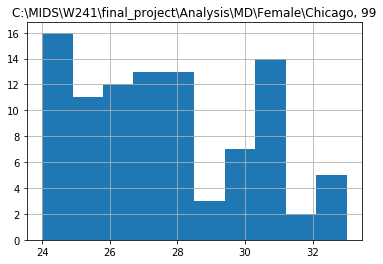

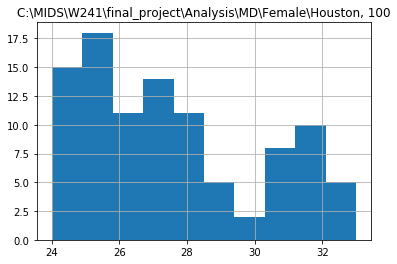

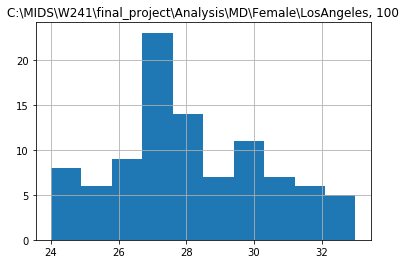

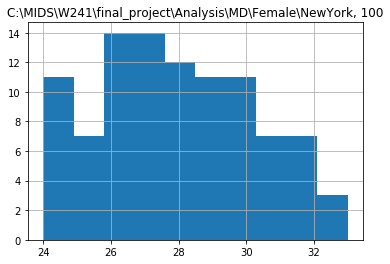

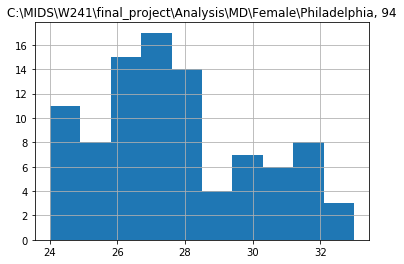

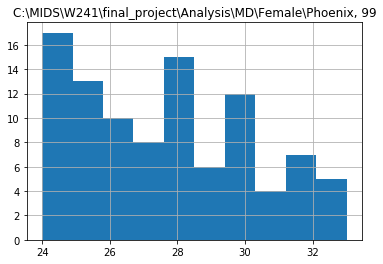

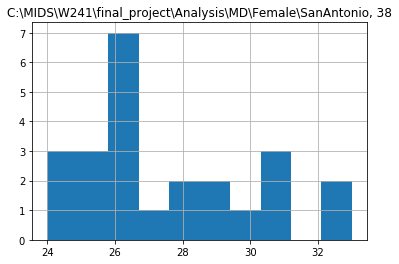

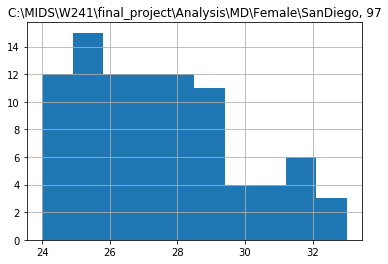

In [5]:
plt.figure()
for d in complete_records:
    edu_sex_city_df = complete_records[d][2]
    edu_sex_city_df = edu_sex_city_df.drop(['filename', 'file_position'], axis=1)
    edu_sex_city_df = edu_sex_city_df.drop_duplicates()
    edu_sex_city_df = edu_sex_city_df.reindex(range(len(edu_sex_city_df)))
    suitor_ages = edu_sex_city_df['age']
    num_suitors = len(complete_records[d][0])
    if suitor_ages.dtypes == 'object':
        for f in range(len(suitor_ages)):
            #print(type(f))
            if type(suitor_ages[f]) is str:
                suitor_ages[f] = float('nan')
    plt.figure(d)
    #print(len(edu_sex_city_df))
    edu_sex_city_df['age'].hist()
    plt.title(d + ', ' + str(num_suitors))
    #print()

In [9]:
#phd_female_chicago = pd.DataFrame(complete_records['C:\MIDS\W241\\final_project\Analysis\PhD\Female\Chicago'][0])
phd_female_chicago = complete_records['C:\MIDS\W241\\final_project\Analysis\PhD\Female\Chicago'][2]

In [10]:
#len(phd_female_chicago)
phd_female_chicago = phd_female_chicago.drop(['filename', 'file_position'], axis=1)
phd_female_chicago = phd_female_chicago.drop_duplicates()
phd_female_chicago

,name,age,detail_1,detail_2
0,Jake,25,SEO Analyst,Webster University
1,Tom,25,University of Chicago,NO DATA
2,Ryan,28,Sales,Northern Illinois University
3,David,24,Audit Associate at Topel Forman LLC,University of North Florida
4,Avet,29,Software Engineer,The University of Chicago
5,Chris,25,York College of Pennsylvania,NO DATA
6,Jose,31,University of Chicago Booth School of Business,NO DATA
7,Adam,27,Apollo Global Management,NO DATA
8,CJ,27,Field Account Executive at SHI International C...,Western Michigan University
9,Jeff,31,Personal Trainer at Equinox Fitness Club,Robert Morris College


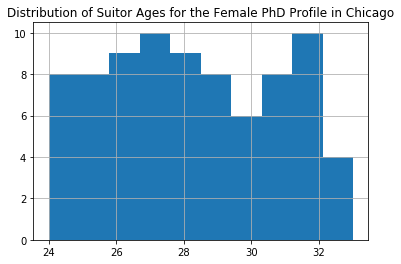

In [11]:
plt.figure()
phd_female_chicago['age'].hist()
plt.title('Distribution of Suitor Ages for the Female PhD Profile in Chicago')

In [37]:
phd_female_chicago.reindex(range(len(phd_female_chicago)))

,name,age,detail_1,detail_2
0,Jake,25.0,SEO Analyst,Webster University
1,Tom,25.0,University of Chicago,NO DATA
2,Ryan,28.0,Sales,Northern Illinois University
3,David,24.0,Audit Associate at Topel Forman LLC,University of North Florida
4,Avet,29.0,Software Engineer,The University of Chicago
5,Chris,25.0,York College of Pennsylvania,NO DATA
6,Jose,31.0,University of Chicago Booth School of Business,NO DATA
7,Adam,27.0,Apollo Global Management,NO DATA
8,CJ,27.0,Field Account Executive at SHI International C...,Western Michigan University
9,Jeff,31.0,Personal Trainer at Equinox Fitness Club,Robert Morris College


In [8]:
for d in complete_records:
    print(d)
    print()

C:\MIDS\W241\final_project\Analysis\PhD\Female\Chicago

C:\MIDS\W241\final_project\Analysis\PhD\Female\Houston

C:\MIDS\W241\final_project\Analysis\PhD\Female\LosAngeles

C:\MIDS\W241\final_project\Analysis\PhD\Female\NewYork

C:\MIDS\W241\final_project\Analysis\PhD\Female\Philadelphia

C:\MIDS\W241\final_project\Analysis\PhD\Female\Phoenix

C:\MIDS\W241\final_project\Analysis\PhD\Female\SanAntonio

C:\MIDS\W241\final_project\Analysis\PhD\Female\SanDiego

C:\MIDS\W241\final_project\Analysis\PhD\Male\Antonio

C:\MIDS\W241\final_project\Analysis\PhD\Male\Boston

C:\MIDS\W241\final_project\Analysis\PhD\Male\Boston\Tag

C:\MIDS\W241\final_project\Analysis\PhD\Male\Chicago

C:\MIDS\W241\final_project\Analysis\PhD\Male\Diego

C:\MIDS\W241\final_project\Analysis\PhD\Male\Houston

C:\MIDS\W241\final_project\Analysis\PhD\Male\Houston\Done

C:\MIDS\W241\final_project\Analysis\PhD\Male\LA

C:\MIDS\W241\final_project\Analysis\PhD\Male\LA\Extras

C:\MIDS\W241\final_project\Analysis\PhD\Male\NY

C:\